In [1]:
import kit
from kit import penguin_color
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)
import palmerpenguins
pg = palmerpenguins.load_penguins().dropna()

## Medidas de dispersión

### ¿Cuál es el valor máximo de las variables?

In [3]:
pg.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

### ¿Cuál es el valor mínimo de las variables?

In [4]:
pg.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

### ¿Cuál es el rango de las variables?

In [5]:
pg.max(numeric_only=True) - pg.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

### ¿Cuál es la desviación estándar de las variables?

In [7]:
pg.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [10]:
pg.mean(numeric_only=True) - pg.std(numeric_only=True)

bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

### ¿Cuál es el rango intercuartílico?

In [13]:
pg.quantile(0.75, numeric_only=True)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [14]:
pg.quantile(0.25, numeric_only=True)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [15]:
pg.quantile(0.75, numeric_only=True) - pg.quantile(0.25, numeric_only=True)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [21]:
(
    pg
    .quantile(
        q=[
            0.75,
            0.50,
            0.25
        ],
        numeric_only=True
    )
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        IQR= lambda df: df[0.75] - df[0.25]
    )
)

,variable,0.75,0.5,0.25,IQR
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


### ¿Cómo puedo visualizar la distribución de una variable?

Histograma

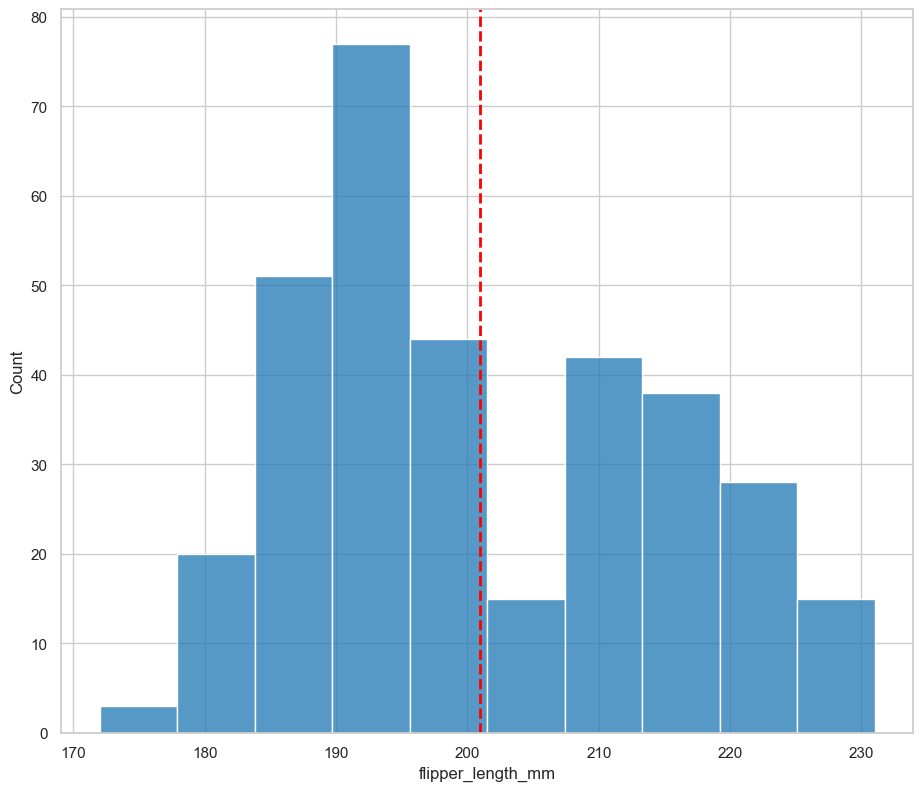

In [24]:
sns.histplot(
    data= pg,
    x= 'flipper_length_mm',
)

plt.axvline(
    x = pg.flipper_length_mm.mean(),
    color= 'red',
    linestyle= 'dashed',
    linewidth= 2
)

Diagrama de caja/boxplot

<Axes: xlabel='flipper_length_mm'>

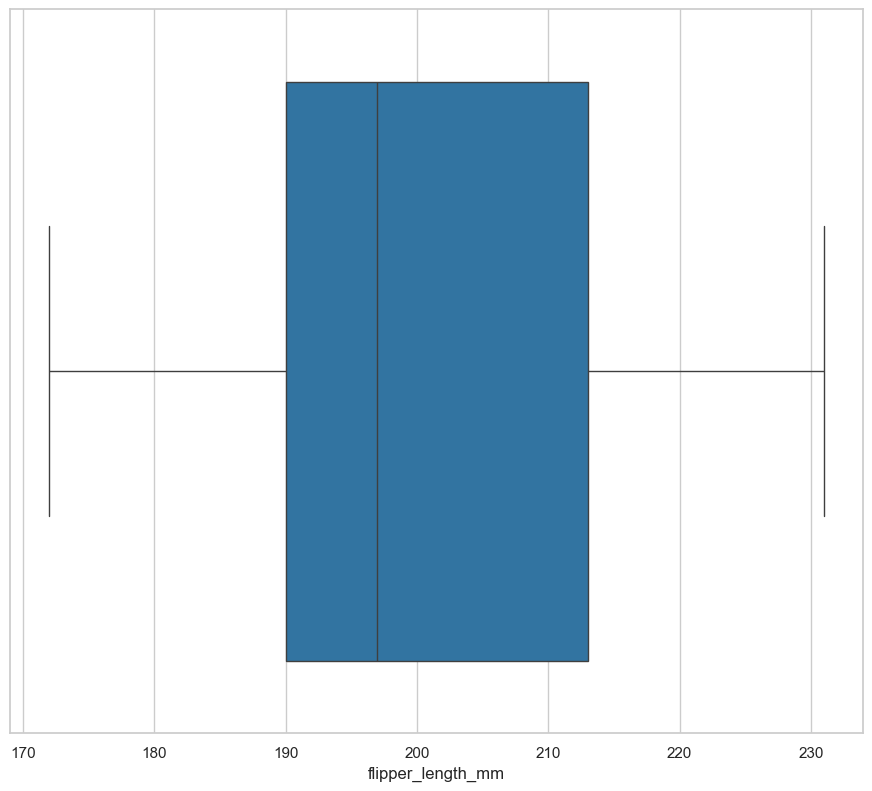

In [25]:
sns.boxplot(
    data= pg,
    x= 'flipper_length_mm'
)

### Limitaciones

In [31]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

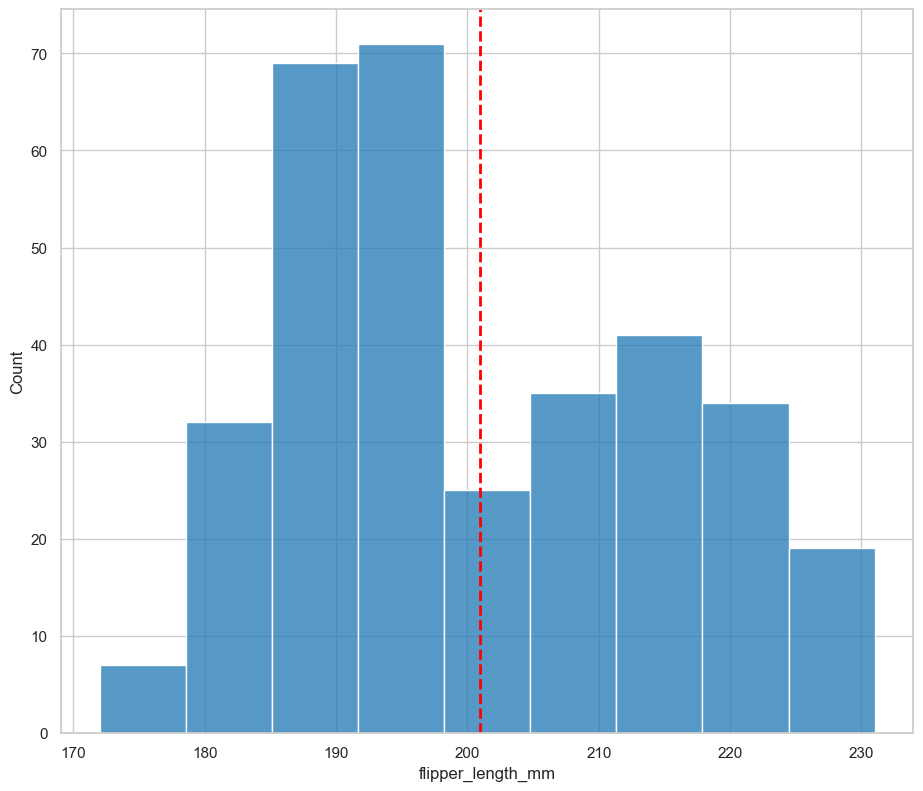

In [32]:
sns.histplot(
    data= pg,
    x= 'flipper_length_mm',
    binwidth=freedman_diaconis_bindwidth(pg.flipper_length_mm)
)

plt.axvline(
    x= pg.flipper_length_mm.mean(),
    color= 'red',
    linestyle= 'dashed',
    linewidth= 2
)